### Importing all necessary libraries 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
import operator
from sklearn import metrics



### Importing dataset

In [2]:
df= pd.read_csv("F:\\Intellipaat\\auto-mpg.csv")

### Understanding the data set

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [4]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

### Checking any nonnumeric values,  thereby replacing ? with NaN value, and replaceing NaN with mean, and converting object into float 

In [5]:
df[df['horsepower'].str.isnumeric()==False]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
32,25.0,4,98.0,?,2046,19.0,71,1,ford pinto
126,21.0,6,200.0,?,2875,17.0,74,1,ford maverick
330,40.9,4,85.0,?,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,?,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,?,2320,15.8,81,2,renault 18i
374,23.0,4,151.0,?,3035,20.5,82,1,amc concord dl


In [6]:
df['horsepower'] = df['horsepower'].replace('?',np.NaN)

In [7]:
df['horsepower'] = df['horsepower'].astype(np.float64)

In [8]:
print(df.dtypes)

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object


In [9]:
df['horsepower'].fillna(df['horsepower'].mean(), inplace = True)

In [10]:
df[["brand", "model"]] = df["car name"].str.split(" ", n = 1, expand = True)

In [11]:
df.drop("car name", axis=1, inplace =True)

In [12]:
df.head(1)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,brand,model
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet,chevelle malibu


In [13]:
df.brand.unique()

array(['chevrolet', 'buick', 'plymouth', 'amc', 'ford', 'pontiac',
       'dodge', 'toyota', 'datsun', 'volkswagen', 'peugeot', 'audi',
       'saab', 'bmw', 'chevy', 'hi', 'mercury', 'opel', 'fiat',
       'oldsmobile', 'chrysler', 'mazda', 'volvo', 'renault', 'toyouta',
       'maxda', 'honda', 'subaru', 'chevroelt', 'capri', 'vw',
       'mercedes-benz', 'cadillac', 'mercedes', 'vokswagen', 'triumph',
       'nissan'], dtype=object)

In [14]:
print(sorted(df.brand.unique()))

['amc', 'audi', 'bmw', 'buick', 'cadillac', 'capri', 'chevroelt', 'chevrolet', 'chevy', 'chrysler', 'datsun', 'dodge', 'fiat', 'ford', 'hi', 'honda', 'maxda', 'mazda', 'mercedes', 'mercedes-benz', 'mercury', 'nissan', 'oldsmobile', 'opel', 'peugeot', 'plymouth', 'pontiac', 'renault', 'saab', 'subaru', 'toyota', 'toyouta', 'triumph', 'vokswagen', 'volkswagen', 'volvo', 'vw']


### Selecting top 10 based on MPG(Miles per Gallon)

In [15]:
df.nlargest(10,'mpg')

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,brand,model
322,46.6,4,86.0,65.000000,2110,17.9,80,3,mazda,glc
329,44.6,4,91.0,67.000000,1850,13.8,80,3,honda,civic 1500 gl
325,44.3,4,90.0,48.000000,2085,21.7,80,2,vw,rabbit c (diesel)
394,44.0,4,97.0,52.000000,2130,24.6,82,2,vw,pickup
326,43.4,4,90.0,48.000000,2335,23.7,80,2,vw,dasher (diesel)
244,43.1,4,90.0,48.000000,1985,21.5,78,2,volkswagen,rabbit custom diesel
309,41.5,4,98.0,76.000000,2144,14.7,80,2,vw,rabbit
330,40.9,4,85.0,104.469388,1835,17.3,80,2,renault,lecar deluxe
324,40.8,4,85.0,65.000000,2110,19.2,80,3,datsun,210
247,39.4,4,85.0,70.000000,2070,18.6,78,3,datsun,b210 gx


### Descriptive analysis

In [16]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.199187,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,76.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,95.000000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


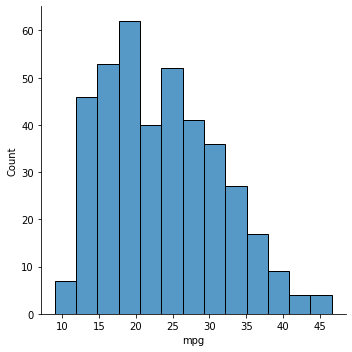

In [17]:
sns.displot(df['mpg'])

<AxesSubplot:xlabel='model year', ylabel='mpg'>

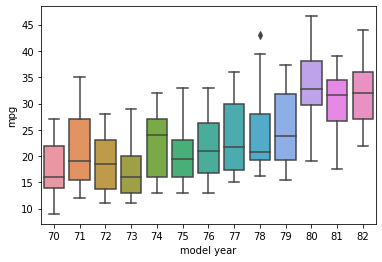

In [18]:
sns.boxplot(x='model year', y='mpg', data=df)

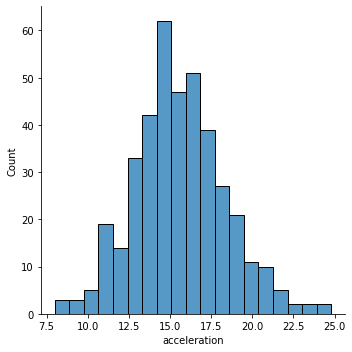

In [19]:
sns.displot(df["acceleration"])

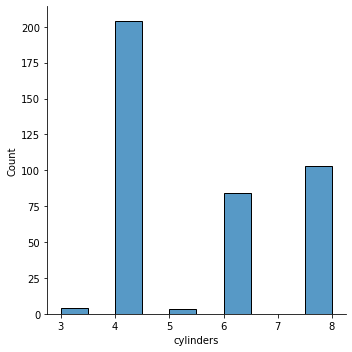

In [20]:
sns.displot(df["cylinders"])

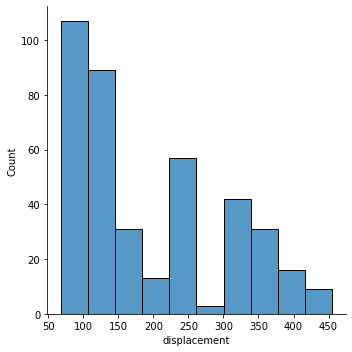

In [21]:
sns.displot(df['displacement'])

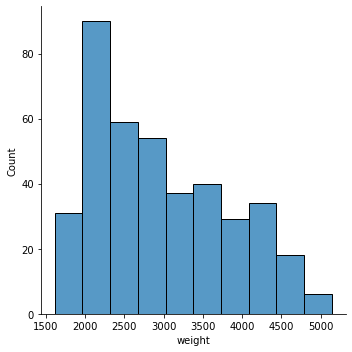

In [22]:
sns.displot(df['weight'])

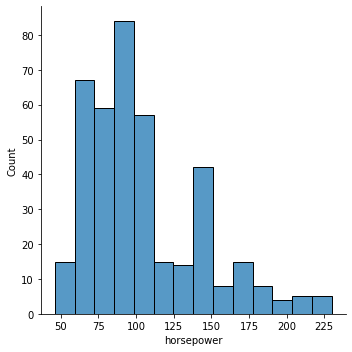

In [23]:
sns.displot(df['horsepower'])

<AxesSubplot:xlabel='count', ylabel='brand'>

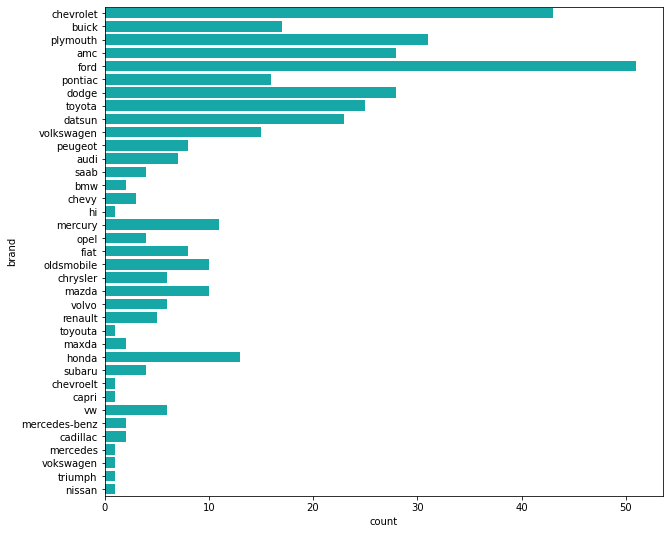

In [24]:
f, ax = plt.subplots(figsize=(10,9))
sns.countplot(y="brand",data=df, color="c")

In [25]:
df.corr(method='pearson')

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
mpg,1.000000,-0.775396,-0.804203,-0.771437,-0.831741,0.420289,0.579267,0.563450
cylinders,-0.775396,1.000000,0.950721,0.838939,0.896017,-0.505419,-0.348746,-0.562543
displacement,-0.804203,0.950721,1.000000,0.893646,0.932824,-0.543684,-0.370164,-0.609409
horsepower,-0.771437,0.838939,0.893646,1.000000,0.860574,-0.684259,-0.411651,-0.453669
weight,-0.831741,0.896017,0.932824,0.860574,1.000000,-0.417457,-0.306564,-0.581024
acceleration,0.420289,-0.505419,-0.543684,-0.684259,-0.417457,1.000000,0.288137,0.205873
model year,0.579267,-0.348746,-0.370164,-0.411651,-0.306564,0.288137,1.000000,0.180662
origin,0.563450,-0.562543,-0.609409,-0.453669,-0.581024,0.205873,0.180662,1.000000


### Training the model

In [26]:
X = df.drop(columns=['mpg','brand','model'])

In [27]:
y=df['mpg']

In [28]:
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

### Model creation

In [29]:
lr=LinearRegression()

In [30]:
lr.fit(X_train, y_train)

LinearRegression()

### Fitting the model

In [31]:
y_pred=lr.predict(X_test)
y_pred

array([12.92372265, 23.96505563, 11.69165515, 21.0938141 , 17.37956039,
       29.92819004, 33.31559657, 23.54432614, 14.22778927, 26.42032754,
       32.92288252, 34.01070146, 21.42723645, 26.81613499, 16.16898361,
       30.23997739, 28.62713677, 28.75535114, 17.43655388, 30.60585406,
       15.45249115, 24.61882495, 27.03253801, 19.89133655, 29.16656011,
       28.29742541, 30.53882381, 30.18895664, 29.05770776, 18.20363647,
       20.69122763, 31.16187189, 21.46990495, 32.22486329, 23.79224245,
       25.64559344, 21.35265459, 16.92461595, 31.71565227,  8.71275881,
        9.94788574, 13.70741104, 25.93158962, 29.86619781, 31.36247232,
       22.34979963, 23.03357125, 13.49034307, 22.1046017 , 27.93806199,
       31.25708709, 26.53945677, 15.37677349, 24.85345291, 14.84249433,
        8.33231605, 19.43837965, 26.16862395, 29.91615796, 14.60535057,
       21.16189861, 24.67779298, 22.00766782, 18.98821152, 10.57385387,
       11.91501754, 10.1650865 , 19.60490544, 23.90821299,  9.93

In [32]:
y_test

65     14.0
132    25.0
74     13.0
78     21.0
37     18.0
       ... 
286    17.6
263    17.7
146    28.0
259    20.8
63     14.0
Name: mpg, Length: 100, dtype: float64

### Comparing Actual Value with predicted value

In [33]:
df_pred=pd.DataFrame(data =[y_pred, y_test])
df_pred.T

,0,1
0,12.923723,14.0
1,23.965056,25.0
2,11.691655,13.0
3,21.093814,21.0
4,17.379560,18.0
...,...,...
95,20.287168,17.6
96,19.748667,17.7
97,25.125461,28.0
98,23.863395,20.8


### Finding Error

In [34]:
print('MAE: ', metrics.mean_absolute_error(y_test, y_pred))
print('MSE: ', metrics.mean_squared_error(y_test, y_pred))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)) )

MAE:  2.7130534135242126
MSE:  11.65294383263377
RMSE:  3.4136408470478803


In [35]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8134611962019125

### Plotting LinearRegression plot

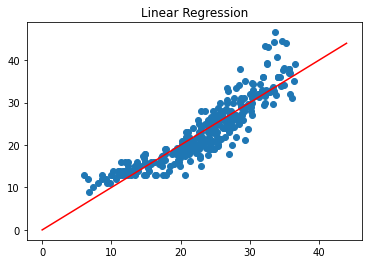

In [36]:
lr = LinearRegression()
lr.fit(X_train,y_train)
LinearReg=lr.predict(X_train)
LinearReg=LinearReg.flatten()
fig, ax =plt.subplots()
ax.scatter(LinearReg,y_train)
plt.plot(np.arange(0,45),np.arange(0,45),color='red')
plt.title('Linear Regression')
plt.show()

### Using pairplot, you can see linear regression plot , each independent variable with dependent variable

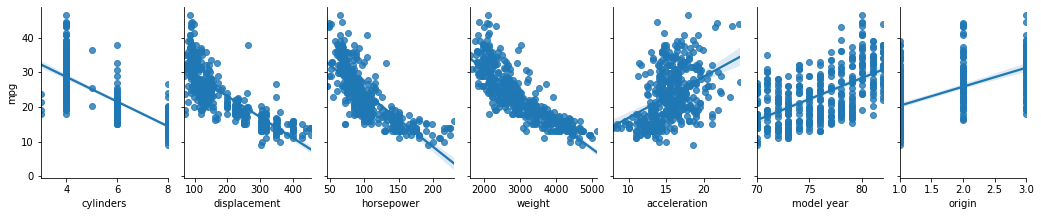

In [39]:
sns.pairplot(df, x_vars=['cylinders','displacement','horsepower','weight','acceleration','model year','origin'] ,  y_vars='mpg', height =3, aspect = 0.7, kind = 'reg')

### By seeing the above pairplot we can analyze, which variable effects the model. So you can remove those variable, and construct the model and you can improve the accuracy of the model.